# Confusion Matrix

In [3]:
!pip install -q seaborn

In [32]:
from tensorflow.keras import datasets, layers, models
#import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
tf.__version__

'2.10.0'

In [6]:
%load_ext tensorboard

In [ ]:
logdir='log' 

## Recuperando do dados para serem testados

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images  = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images/255.0 , test_images/255.0

classes = [0,1,2,3,4,5,6,7,8,9]

## Criando o modelo de testes

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# camada de saida
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1732 - accuracy: 0.9462 - val_loss: 0.0565 - val_accuracy: 0.9803
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0540 - accuracy: 0.9828 - val_loss: 0.0385 - val_accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0396 - val_accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0386 - val_accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0361 - val_accuracy: 0.9887


In [13]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [25]:
print(y_true[0])
print(y_pred[0])

7
[7.2192554e-09 4.6960899e-06 1.9106383e-06 1.8863500e-06 1.7818567e-06
 8.0243456e-09 9.7638057e-11 9.9998605e-01 2.7200116e-08 3.6202982e-06]


In [29]:
y_pred_classes = tf.argmax(y_pred, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes)
#con_mat = tf.numpy_function(confusion_matrix)
con_mat = confusion_matrix.numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

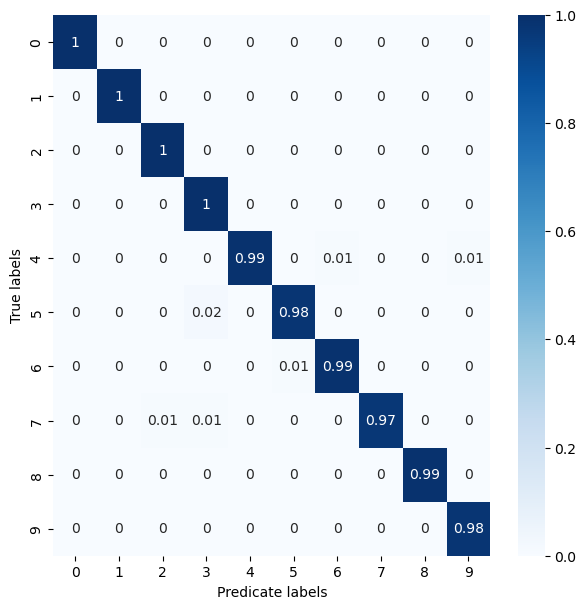

In [36]:
# plotando a imagem
figure = plt.figure(figsize=(6,6))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True labels')
plt.xlabel('Predicate labels')
plt.show()